In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Carregar o CSV tratado
df = pd.read_csv('publicacoes_pje_2024_tratado.csv')

# Separar entrada e saída
X = df['texto']
y = df['tipoComunicacao']

# Dividir treino e projeto aplicado 2
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [4]:
# Vetorização TF-IDF
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [5]:
# Instanciar o modelo
rf_model = RandomForestClassifier(random_state=42)

# Treinar o modelo
rf_model.fit(X_train_tfidf, y_train)


RandomForestClassifier(random_state=42)

In [6]:
# Previsões
y_pred = rf_model.predict(X_test_tfidf)


In [7]:
# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Exibir resultados
print(f'Acurácia: {accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')


Acurácia: 0.9167
Precisão: 0.9178
Recall: 0.9167
F1-Score: 0.9157


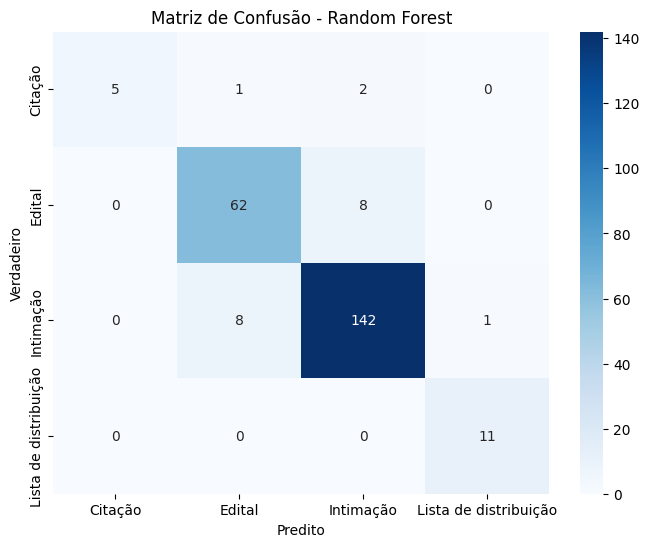

In [8]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.ylabel('Verdadeiro')
plt.xlabel('Predito')
plt.title('Matriz de Confusão - Random Forest')
plt.show()
